<a href="https://colab.research.google.com/github/Seeeeeyo/NLP_course_team_project/blob/main/tweets_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DKE - Natural Language Processing


# Group Project 2021

*Clément Detry, Karim Eschweiler, Selim Gilon, Aaron Schapira, Adèle Imparato*
*****



💡 Table of contents
1. Data Scraping 
2. Pre Processing
3. Data Visualisation
4. Filtering
5. Feature Creator
6. Machine Learning Classifiers
7. Results Summary

*****

## Imports


In [ ]:
!pip install preprocessor
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import tweepy
import json
import pandas as pd
import csv
import re
from textblob import TextBlob
import string
import preprocessor as p
import os
import time
import numpy as np
import nltk
import math
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import tokenize
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.sparse import dok_matrix
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from io import StringIO
from google.colab import drive
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.datasets import make_blobs
from sklearn import tree
from sklearn import metrics
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Dropout
drive.mount('/content/drive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Data Scraping


In [ ]:
# consumer_key = "ejTMdLHbqomEu6tqjz0Ct2SAH"
# consumer_secret = "it0vg7vYrsiQD6zegPxwGAhnQlgr1J8JhgSkMF16V4vgduZJLC"
# access_token = "2340686088-l2LRhaDbvPJS7UhIjFiq49amDdEkrIleBZZPryY"
# access_token_secret = "hLNaOCmqnzdaNvhoUEzSsh2URstMRGWYt9T0flmYydRQ6"
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_token_secret)
# api = tweepy.API(auth,wait_on_rate_limit=True)
# count = 400
# df = pd.read_excel('/content/drive/MyDrive/DKE Bros/Year 3/Block 3.5/NLP/Project/database.xlsx', usecols=['Handle','Name','Party']) 
# usernames = df['Handle'].to_numpy()
# tweets = []
# for username in usernames:
#   userID = username
#   tweets.extend(api.user_timeline(screen_name=userID, 
#                             count=count,
#                             tweet_mode = 'extended',
#                             include_rts = False))
#   # extend still .... for longer tweets
#   #print("Number of Tweets Extracted: {}.\n".format(len(tweets)))

# tweet_df = pd.DataFrame(data=[[tweet.full_text, tweet.created_at, tweet.user.screen_name, len(tweet.full_text)] for tweet in tweets], 
#                         columns = ['Tweet_Text', 'Tweet_Date', 'UserName','Tweet_Length'])


# # Example of text from column 'Tweet_Text'

# # Passing the #AmericanFamiliesPlan will significantly impact the lives of 
# # Central Florida’s families and invest in future generations. It is crucial for 
# # Congress to work together and get this passed.\n\nFor a Florida-specific 
# #fact sheet, visit https://t.co/jOr4KnHVQ0 https://t.co/7pxXxTzoBS

# result = pd.merge(df, tweet_df, left_on="Handle", right_on = "UserName")
# result.drop("Handle", axis = 1, inplace = True)
# headers = ['Party','Name', 'Tweet_Text', 'Tweet_Date', 'UserName', 'Tweet_Length']
# result.to_csv("tweets.csv", header=headers)

### Load tweets from drive

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DKE Bros/Year 3/Block 3.5/NLP/Project/tweets.csv', index_col=[0]) 
data['numClass'] = data['Party'].map({'Democrat':0, 'Republican':1})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head()

,Party,Name,Tweet_Text,Tweet_Date,UserName,Tweet_Length,numClass
0,Democrat,US Rep. Darren Soto,Passing the #AmericanFamiliesPlan will signifi...,2021-05-10 18:48:16,RepDarrenSoto,288,0
1,Democrat,US Rep. Darren Soto,We are following the deadly shooting reported ...,2021-05-10 15:18:58,RepDarrenSoto,266,0
2,Democrat,US Rep. Darren Soto,#ProtectOurCare,2021-05-10 13:21:41,RepDarrenSoto,15,0
3,Democrat,US Rep. Darren Soto,We are fighting to pass the #LowerDrugCostsNOW...,2021-05-10 13:19:07,RepDarrenSoto,193,0
4,Democrat,US Rep. Darren Soto,Wishing a Happy #MothersDay2021 and joyous reu...,2021-05-09 14:43:06,RepDarrenSoto,131,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23208 entries, 0 to 23207
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Party         23208 non-null  object
 1   Name          23208 non-null  object
 2   Tweet_Text    23208 non-null  object
 3   Tweet_Date    23208 non-null  object
 4   UserName      23208 non-null  object
 5   Tweet_Length  23208 non-null  int64 
 6   numClass      23208 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [ ]:
data.tail()

,Party,Name,Tweet_Text,Tweet_Date,UserName,Tweet_Length,numClass
23203,Republican,Mike Enzi,I’ve long been a proponent of allowing the Wyo...,2020-05-29 00:29:14,SenatorEnzi,274,1
23204,Republican,Mike Enzi,I’m disappointed in a federal judge’s decision...,2020-05-29 00:29:14,SenatorEnzi,142,1
23205,Republican,Mike Enzi,While our lives have changed in the last coupl...,2020-05-25 13:58:00,SenatorEnzi,246,1
23206,Republican,Mike Enzi,Wyoming leads in uranium production and the Ru...,2020-05-21 17:49:53,SenatorEnzi,267,1
23207,Republican,Mike Enzi,Between the drop in fuel demand and the tripli...,2020-05-20 18:30:43,SenatorEnzi,169,1


In [ ]:
print("There are", data.shape[0], "tweets.")

There are 23208 tweets.


## 2. Preprocessing

In [ ]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

newData = pd.DataFrame()
def removeStopWords(tokens):
  stop_words = set(stopwords.words('english'))
  text_without_stopWords = [word for word in tokens if not word in stop_words]
  return text_without_stopWords

def allToLowerCase(tokens):
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  return tokens

def removeLinks(tokens):
  out = []
  for token in tokens:
    # temp = re.sub(r'^https?:\/\/.*[\r\n]*', '', token)
    temp = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", token)
    if len(temp) > 0:
      out.append(temp)
  return out

def createHashtagDic(tokens):
  out = {}
  for i in range(len(tokens)):
    if tokens[i][0] == '#':
      if tokens[i][1:len(tokens[i])] in out:
        out[tokens[i][1:len(tokens[i])]] += 1
      else:
        out[tokens[i][1:len(tokens[i])]] = 1
  return out

def removeSymbols(tokens):
  out = []
  for token in tokens:
    temp = re.sub('[^a-zA-Z]', '', token)
    if len(temp) > 0 and temp != 'amp':
      out.append(temp)
  return out

def createVoc(tokens):
  out = {}
  for token in tokens:
    if token in out.keys():
      out[token] += 1
    else:
      out[token] = 1
  return out

def createDemocRepubVoc(tweets):
  repub_voc = {}
  demo_voc = {}
  for i in range(len(tweets)):
    temp = data.Tweet_Text.iloc[i].split()
    if data['Party'].iloc[i] == 'Republican':
      for token in temp:
        if token in repub_voc:
          repub_voc[token] += 1
        else:
          repub_voc[token] = 1
    elif data['Party'].iloc[i] == 'Democrat':
      for token in temp:
        if token in demo_voc:
          demo_voc[token] += 1
        else:
          demo_voc[token] = 1
  return repub_voc, demo_voc

veryHighFreqVoc = {}
highFreqVoc = {}
normalFreqVoc = {}
lowFreqVoc = {}
veryLowFreqVoc = {}
def splitVocIntoFreqGroups(voc):
  for key in voc.keys():
    if voc[key] > 0 and voc[key] <= 100:
      veryLowFreqVoc[key] = voc[key]
    elif voc[key] > 100 and voc[key] <= 200:
      lowFreqVoc[key] = voc[key]
    elif voc[key] > 200 and voc[key] <= 300:
      normalFreqVoc[key] = voc[key]
    elif voc[key] > 300 and voc[key] <= 400:
      highFreqVoc[key] = voc[key]
    else:
      veryHighFreqVoc[key] = voc[key]

tokens = []
for tweet in data.Tweet_Text:
  for token in tweet.split():
    tokens.append(token)

voc_before_PP = createVoc(tokens)

hashtag_dic = createHashtagDic(tokens)

# Pre processing bloc of code
lemma = WordNetLemmatizer()
for i in range(len(data.Tweet_Text)):
  temp = data.Tweet_Text.iloc[i].split()
  temp = removeLinks(temp)
  temp = allToLowerCase(temp)
  temp = removeSymbols(temp)
  temp = removeStopWords(temp)
  for j in range(len(temp)):
    temp[j] = lemma.lemmatize(temp[j], pos=get_wordnet_pos(temp[j]))
  s = " ".join(temp)
  newData.at[i, 'Tweet_Text'] = s
data['Tweet_Text']  = newData['Tweet_Text'] 

tokens = []
for tweet in data.Tweet_Text:
  for token in tweet.split():
    tokens.append(token)

voc_after_PP = createVoc(tokens)

data_items = voc_after_PP.items()
data_list = list(data_items)
df = pd.DataFrame(data_list)

df.to_csv('voc_after_PP.csv')

splitVocIntoFreqGroups(voc_after_PP)

repub_voc, demo_voc = createDemocRepubVoc(data.Tweet_Text)

tokens = []
for tweet in data.Tweet_Text:
  for token in tweet.split():
    tokens.append(token)


## 3. Data Visualization

### Word Clouds

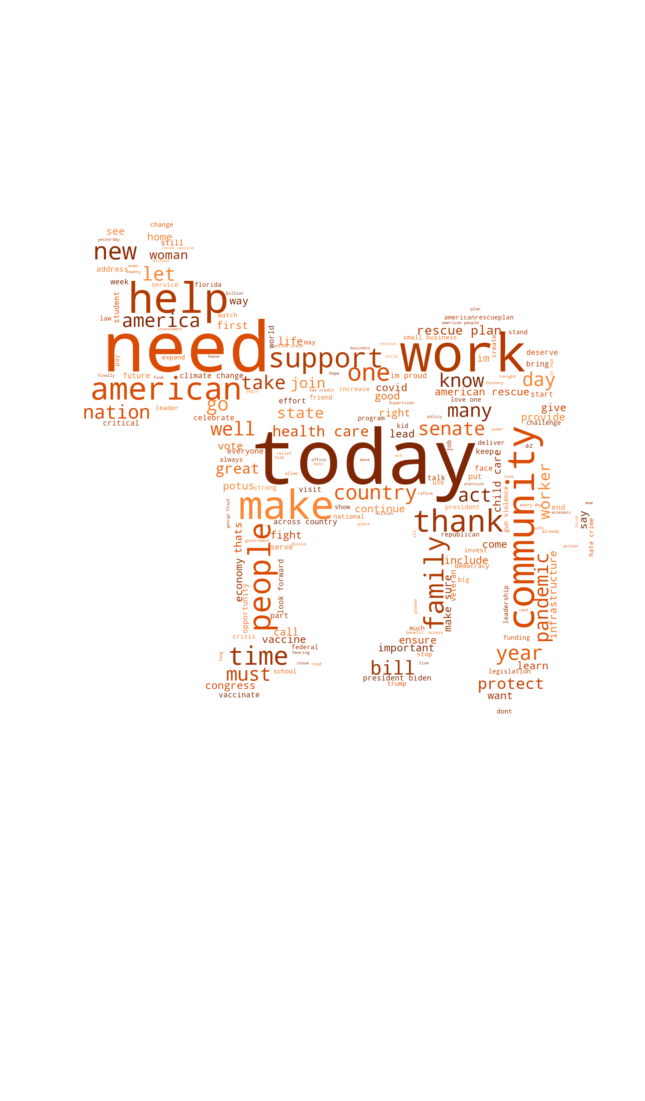

In [ ]:
# WORD CLOUD
cmap_O = mpl.cm.Oranges(np.linspace(0,1,20))
cmap_O = mpl.colors.ListedColormap(cmap_O[10:,:-1])

#Font parameters for our Title
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 36,}

#Creating variable with data for this Word Cloud
temp = data[data['Party'] == 'Democrat']
textS = ' '.join(temp['Tweet_Text'].tolist())

# Mask for the Word Cloud
cb_mask_democrat = np.array(Image.open('/content/drive/MyDrive/DKE Bros/Year 3/Block 3.5/NLP/Project/logo-Democrat.jpg'))
stop_words=set(STOPWORDS)

cb_wc=WordCloud(width=400,height=200,mask=cb_mask_democrat,random_state=101, max_font_size=450,
                 min_font_size=3,stopwords=stop_words,background_color="white",
                 scale=3,max_words=200,collocations=True,colormap=cmap_O)

#Generate it
cb_wc.generate(str(textS))

fig=plt.figure(figsize=(20,20))
plt.ylim(-400,2700)
plt.gca().invert_yaxis()
plt.axis("off")
plt.imshow(cb_wc,interpolation='bilinear')
plt.show()

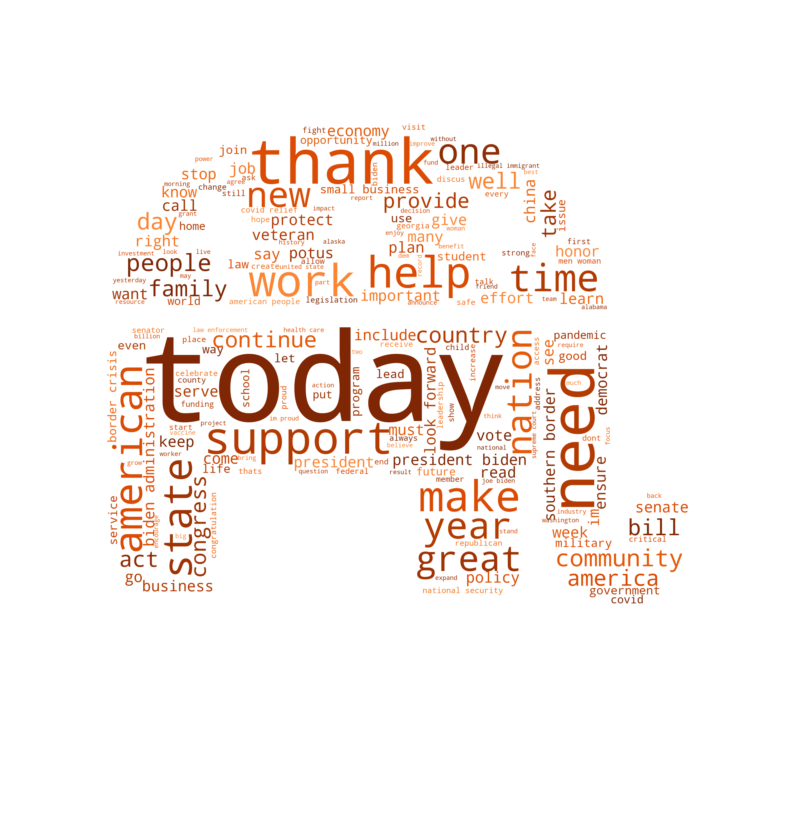

In [ ]:
# WORD CLOUD

cmap_O = mpl.cm.Oranges(np.linspace(0,1,20))
cmap_O = mpl.colors.ListedColormap(cmap_O[10:,:-1])

#Font parameters for our Title
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 36,}

#Creating variable with data for this Word Cloud
temp = data[data['Party'] == 'Republican']
textS = ' '.join(temp['Tweet_Text'].tolist())

# Mask for the Word Cloud
cb_mask_republican = np.array(Image.open('/content/drive/MyDrive/DKE Bros/Year 3/Block 3.5/NLP/Project/logo-Republican.jpg'))
stop_words=set(STOPWORDS)

cb_wc=WordCloud(width=400,height=200,mask=cb_mask_republican,random_state=101, max_font_size=450,
                 min_font_size=3,stopwords=stop_words,background_color="white",
                 scale=3,max_words=200,collocations=True,colormap=cmap_O)

#Generate it
cb_wc.generate(str(textS))

fig=plt.figure(figsize=(15,15))
plt.ylim(-400,2700)
plt.gca().invert_yaxis()
plt.axis("off")
plt.imshow(cb_wc,interpolation='bilinear')
plt.show()

### Bar Plots

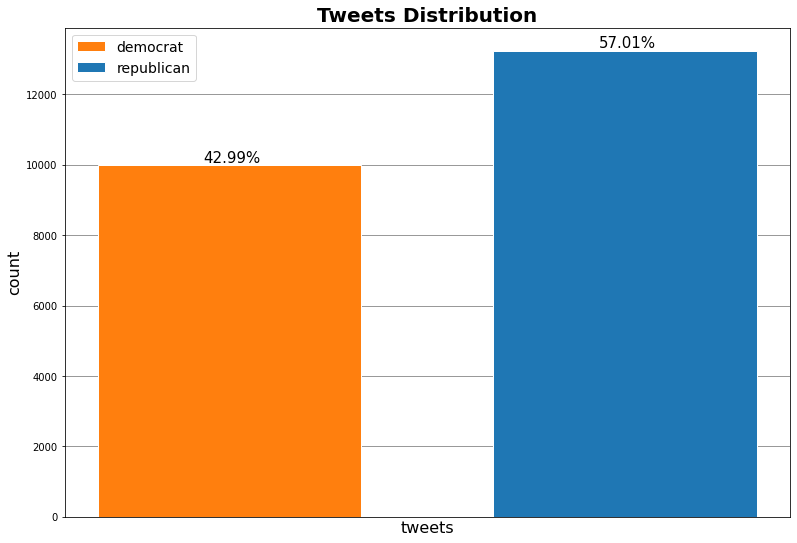

In [ ]:
bar_demo = [len(data.numClass[data.numClass == 0])]
bar_repub = [len(data.numClass[data.numClass == 1])]

fig=plt.figure(figsize=(13,9))

plt.bar(0, bar_demo, color='tab:orange', width=0.1, edgecolor='white', label='democrat')
plt.bar(0.15, bar_repub, color='tab:blue', width=0.1, edgecolor='white', label='republican')
 
plt.xlabel('tweets', fontsize=16)
plt.xticks([])

plt.ylabel('count', fontsize=16)

plt.title('Tweets Distribution', fontweight='bold', fontsize = 20)

axes = plt.gca()
axes.set_axisbelow(True)
axes.yaxis.grid(color='gray')

totals = []
for i in axes.patches:
  totals.append(i.get_height())

total = sum(totals)

for i in axes.patches:
  axes.text(i.get_x()+.04, i.get_height()+100, str(round((i.get_height()/total)*100, 2))+'%', fontsize=15, color='black')

plt.legend(fontsize=14)
plt.show()

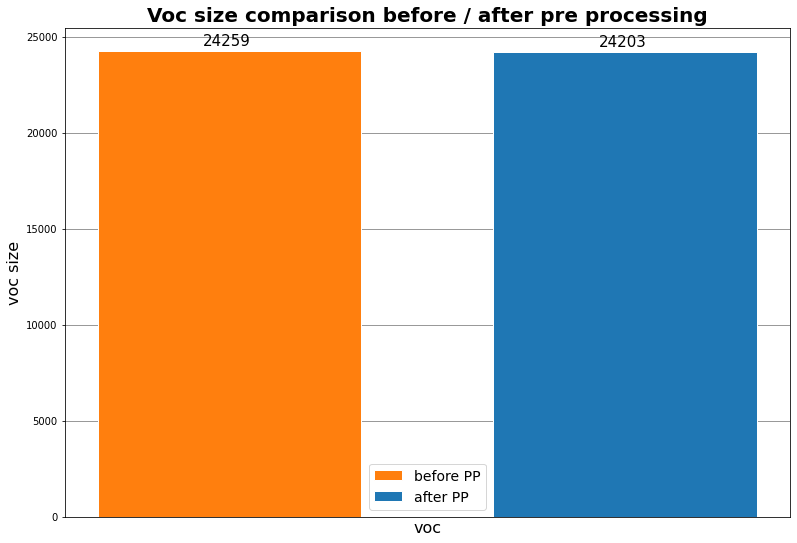

In [ ]:
bars_before_PP = [len(voc_before_PP)]
bars_after_PP = [len(voc_after_PP)]

fig=plt.figure(figsize=(13,9))

plt.bar(0, bars_before_PP, color='tab:orange', width=0.1, edgecolor='white', label='before PP')
plt.bar(0.15, bars_after_PP, color='tab:blue', width=0.1, edgecolor='white', label='after PP')
 
plt.xlabel('voc', fontsize=16)
plt.xticks([])

plt.ylabel('voc size', fontsize=16)

plt.title('Voc size comparison before / after pre processing', fontweight='bold', fontsize = 20)

axes = plt.gca()
axes.set_axisbelow(True)
axes.yaxis.grid(color='gray')

values = [bars_before_PP[0], bars_after_PP[0]]
index = 0
for i in axes.patches:
  axes.text(i.get_x()+.04, i.get_height()+300, values[index], fontsize=15, color='black')
  index+=1

plt.legend(fontsize=14)
plt.show()

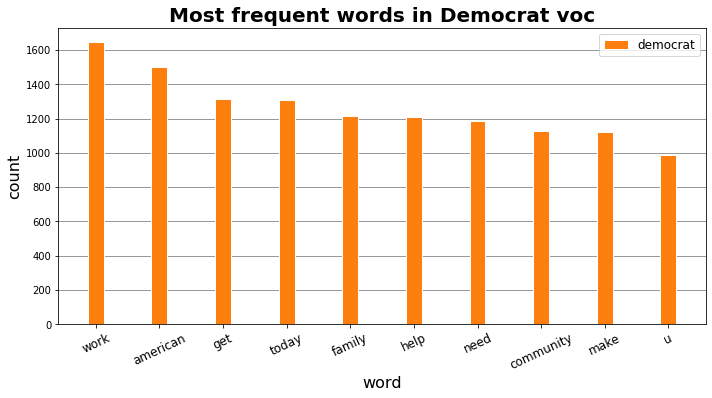

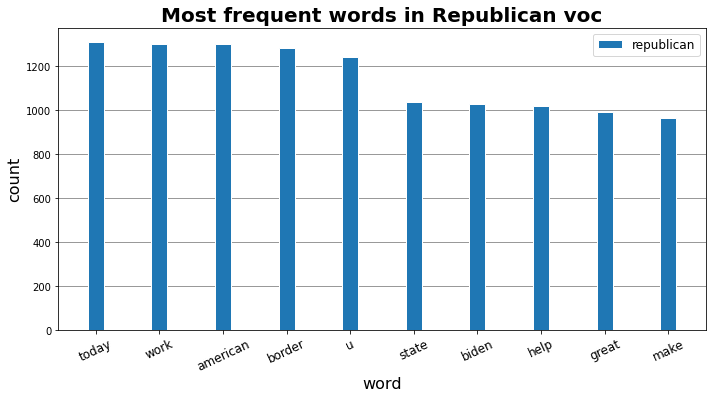

In [ ]:
threshold = 10
i = 0
temp_repub = {}
for key in sorted(repub_voc, key=repub_voc.get, reverse=True):
  temp_repub[key] = repub_voc[key]
  i+=1
  if i >= threshold:
    break

i = 0
temp_demo = {}
for key in sorted(demo_voc, key=demo_voc.get, reverse=True):
  temp_demo[key] = demo_voc[key]
  i+=1
  if i >= threshold:
    break


barWidth = 0.25

bars_demo = []
bars_x = []
for key in temp_demo.keys():
  bars_demo.append(temp_demo[key])
  bars_x.append(key)
 
r1 = np.arange(len(bars_demo))
r2 = [x + barWidth for x in r1]
 
fig=plt.figure(figsize=(11.6,12))

plt.subplot(2, 1, 1)

plt.bar(r1, bars_demo, color='tab:orange', width=barWidth, edgecolor='white', label='democrat')
 
plt.xlabel('word', fontsize=16)
plt.xticks([r for r in range(len(bars_demo))], bars_x, fontsize = 12)
plt.xticks(rotation=25)

plt.ylabel('count', fontsize=16)

plt.title('Most frequent words in Democrat voc', fontweight='bold', fontsize = 20)

axes = plt.gca()
axes.set_axisbelow(True)
axes.yaxis.grid(color='gray')

plt.legend(fontsize=12)


bars_repub = []
bars_x = []
for key in temp_repub.keys():
  bars_repub.append(temp_repub[key])
  bars_x.append(key)
 
r1 = np.arange(len(bars_repub))
r2 = [x + barWidth for x in r1]
 
fig=plt.figure(figsize=(10,10))

plt.subplot(2, 1, 2)

plt.bar(r1, bars_repub, color='tab:blue', width=barWidth, edgecolor='white', label='republican')
 
plt.xlabel('word', fontsize=16)
plt.xticks([r for r in range(len(bars_repub))], bars_x, fontsize = 12)
plt.xticks(rotation=25)

plt.ylabel('count', fontsize=16)

plt.title('Most frequent words in Republican voc', fontweight='bold', fontsize = 20)

axes = plt.gca()
axes.set_axisbelow(True)
axes.yaxis.grid(color='gray')

plt.legend(fontsize=12)

plt.tight_layout()

plt.show()

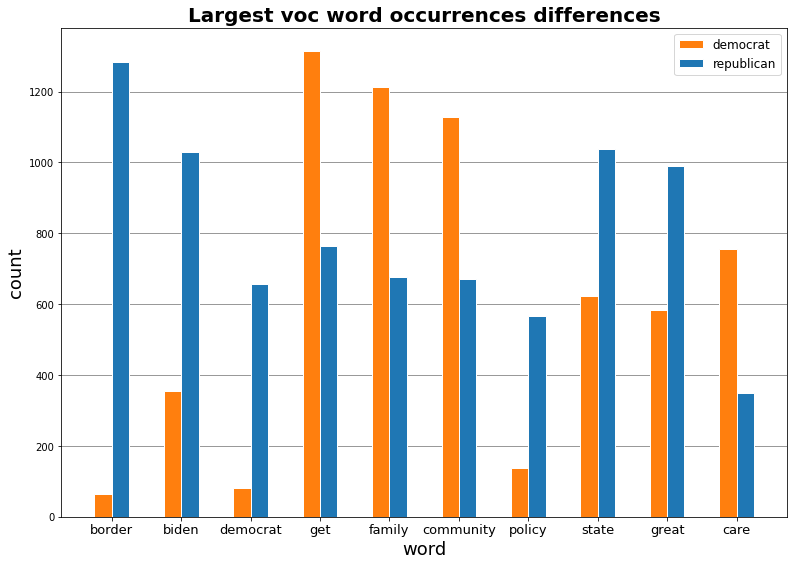

In [ ]:
diff_voc = {}
for key in repub_voc.keys():
  if key in demo_voc.keys():
    diff_voc[key] = abs(repub_voc[key] - demo_voc[key])
  else:
    diff_voc[key] = repub_voc[key]

for key in demo_voc.keys():
  if key not in diff_voc.keys():
    diff_voc[key] = demo_voc[key]

i = 0
threshold = 10
temp = {}
for key in sorted(diff_voc, key=diff_voc.get, reverse=True):
  temp[key] = diff_voc[key]
  i+=1
  if i >= threshold:
    break
diff_voc = temp


# Difference visualization


barWidth = 0.25

bars_repub = []
bars_demo = []
bars_diff = []
for key in diff_voc.keys():
  bars_repub.append(repub_voc[key])
  bars_demo.append(demo_voc[key])
  bars_diff.append(key)
 
r1 = np.arange(len(bars_repub))
r2 = [x + barWidth for x in r1]
 
fig=plt.figure(figsize=(13,9))

plt.bar(r1, bars_demo, color='tab:orange', width=barWidth, edgecolor='white', label='democrat')
plt.bar(r2, bars_repub, color='tab:blue', width=barWidth, edgecolor='white', label='republican')
 
plt.xlabel('word', fontsize=18)
plt.xticks([r + barWidth/2 for r in range(len(bars_repub))], bars_diff, fontsize = 13)

plt.ylabel('count', fontsize=18)

plt.title('Largest voc word occurrences differences', fontweight='bold', fontsize = 20)

axes = plt.gca()
axes.set_axisbelow(True)
axes.yaxis.grid(color='gray')

plt.legend(fontsize=12)
plt.show()

In [ ]:
def create_n_gram(tokens, n_gram, n):

  for i in range(len(tokens)-1):
    temp1 = tuple(tokens[i:i+n])
    if temp1 in n_gram.keys():
      n_gram[temp1] += 1
    else:
      n_gram[temp1] = 1

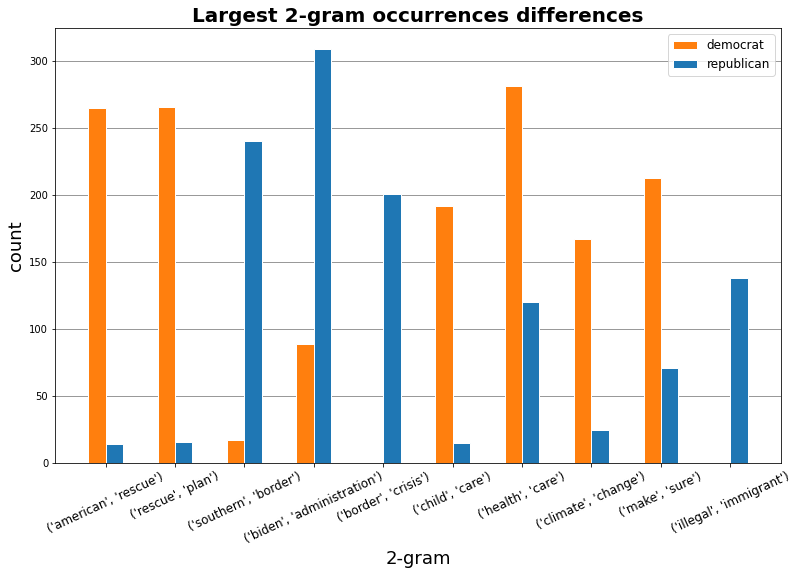

In [ ]:
repub_2_gram = {}
demo_2_gram = {}
for i in range(len(data.Tweet_Text)):
  temp = data.Tweet_Text.iloc[i].split()
  if data['Party'].iloc[i] == 'Republican':
    create_n_gram(tokens=temp, n_gram=repub_2_gram, n=2)
  elif data['Party'].iloc[i] == 'Democrat':
    create_n_gram(tokens=temp, n_gram=demo_2_gram, n=2)

diff_voc = {}
for key in repub_2_gram.keys():
  if key in demo_2_gram.keys():
    diff_voc[key] = abs(repub_2_gram[key] - demo_2_gram[key])
  else:
    diff_voc[key] = repub_2_gram[key]

for key in demo_2_gram.keys():
  if key not in diff_voc.keys():
    diff_voc[key] = demo_2_gram[key]

i = 0
threshold = 10
temp = {}
for key in sorted(diff_voc, key=diff_voc.get, reverse=True):
  temp[key] = diff_voc[key]
  i+=1
  if i >= threshold:
    break
diff_voc = temp


# Difference visualization


barWidth = 0.25

bars_repub = []
bars_demo = []
bars_diff = []
for key in diff_voc.keys():
  if key in repub_2_gram.keys():
    bars_repub.append(repub_2_gram[key])
  else:
    bars_repub.append(0)
  if key in demo_2_gram.keys():
    bars_demo.append(demo_2_gram[key])
  else:
    bars_demo.append(0)
  bars_diff.append(key)
 
r1 = np.arange(len(bars_repub))
r2 = [x + barWidth for x in r1]
 
fig=plt.figure(figsize=(13,8))

plt.bar(r1, bars_demo, color='tab:orange', width=barWidth, edgecolor='white', label='democrat')
plt.bar(r2, bars_repub, color='tab:blue', width=barWidth, edgecolor='white', label='republican')
 
plt.xlabel('2-gram', fontsize=18)
plt.xticks([r + barWidth/2 for r in range(len(bars_repub))], bars_diff, fontsize = 12)
plt.xticks(rotation=25)

plt.ylabel('count', fontsize=18)

plt.title('Largest 2-gram occurrences differences', fontweight='bold', fontsize = 20)

axes = plt.gca()
axes.set_axisbelow(True)
axes.yaxis.grid(color='gray')

plt.legend(fontsize=12)
plt.show()

## 4. Filtering

In [ ]:
def filter_voc(threshold):
  voc_after_PP_filtered = {}
  id_after_PP_filtered = {}
  count = 0
  for key, value in voc_after_PP.items():
    if value > threshold:
      voc_after_PP_filtered[key] = value
      id_after_PP_filtered[key] = count
      count+=1
  return voc_after_PP_filtered, id_after_PP_filtered

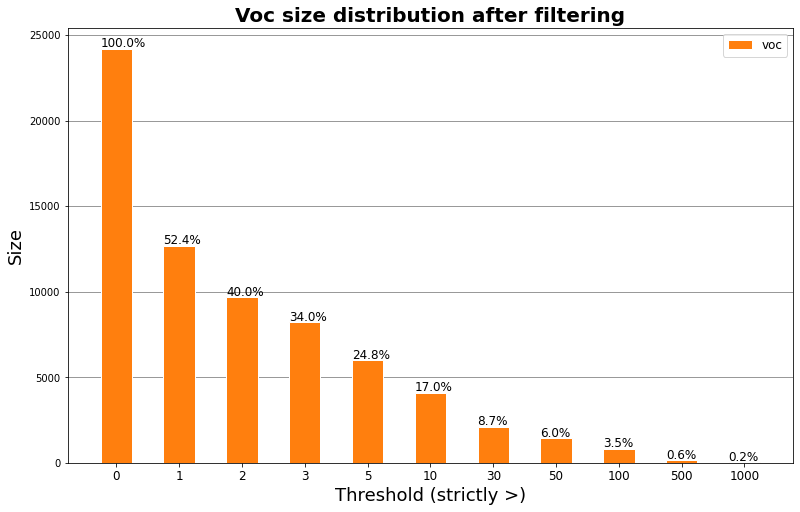

In [ ]:
barWidth = 0.5

# hard-coded values for voc size with filter
X_Bars = [len(voc_after_PP), 12680, 9678, 8221, 5986, 4100, 2100, 1441, 827, 135, 44]

r = np.arange(len(X_Bars))
 
fig=plt.figure(figsize=(13,8))

plt.bar(r, X_Bars, color='tab:orange', width=barWidth, edgecolor='white', label='voc')

bars_x = ['0', '1', '2', '3', '5', '10', '30', '50', '100', '500', '1000']

plt.xlabel('Threshold (strictly >)', fontsize=18)
plt.xticks([r + barWidth-0.5 for r in range(len(X_Bars))], bars_x, fontsize = 12)

plt.ylabel('Size', fontsize=18)

plt.title('Voc size distribution after filtering', fontweight='bold', fontsize = 20)

axes = plt.gca()
axes.set_axisbelow(True)
axes.yaxis.grid(color='gray')

index = 0
for i in axes.patches:
  digits=1
  t1=10**digits
  value = math.ceil(((X_Bars[index]/len(voc_after_PP))*100)*t1)/t1
  axes.text(i.get_x(), i.get_height()+100, str(value)+'%', fontsize=12, color='black')
  index+=1

plt.legend(fontsize=12)
plt.show()

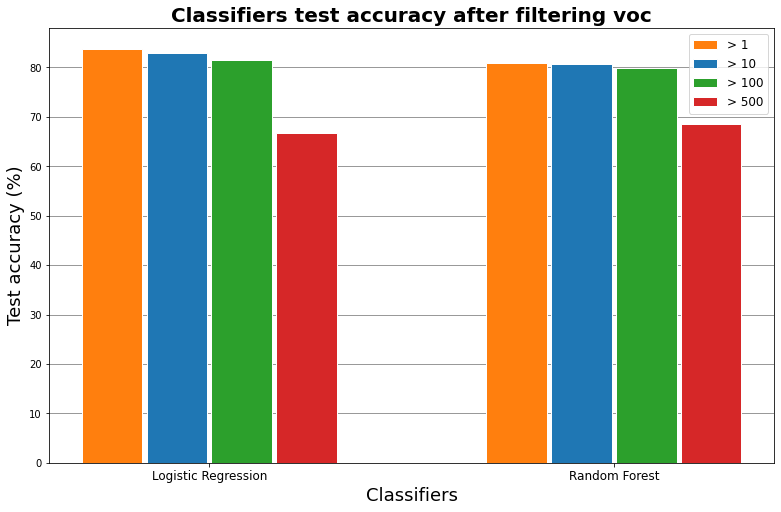

In [ ]:
barWidth = 0.15

bars_x_1 = [83.8, 80.9]
bars_x_10 = [82.9, 80.6]
bars_x_100 = [81.5, 79.9]
bars_x_500 = [66.8, 68.6]

r = np.arange(len(bars_x_1)) 
r1 = [x + barWidth +0.01 for x in r]
r2 = [x + barWidth +0.01 for x in r1]
r3 = [x + barWidth +0.01 for x in r2]
r4 = [x + barWidth +0.01 for x in r3]
 
fig=plt.figure(figsize=(13,8))

plt.bar(r1, bars_x_1, color='tab:orange', width=barWidth, edgecolor='white', label='> 1')
plt.bar(r2, bars_x_10, color='tab:blue', width=barWidth, edgecolor='white', label='> 10')
plt.bar(r3, bars_x_100, color='tab:green', width=barWidth, edgecolor='white', label='> 100')
plt.bar(r4, bars_x_500, color='tab:red', width=barWidth, edgecolor='white', label='> 500')

bars_x = ['Logistic Regression', 'Random Forest']
 
plt.xlabel('Classifiers', fontsize=18)
plt.xticks([r + barWidth + 0.25 for r in range(len(bars_x))], bars_x, fontsize = 12)

plt.ylabel('Test accuracy (%)', fontsize=18)

plt.title('Classifiers test accuracy after filtering voc', fontweight='bold', fontsize = 20)

axes = plt.gca()
axes.set_axisbelow(True)
axes.yaxis.grid(color='gray')

plt.legend(fontsize=12)
plt.show()

## 5. Feature Creator

### Bag of Words

In [ ]:
class Feature():
  
  def __init__(self):
    self.voc = {}
    self.id = {}
    self.count = 0

  def createFeatureSet(self):

    for tweet in data.Tweet_Text:
      for w in tweet.split():
        if w in self.voc.keys():
          self.voc[w] += 1
        else:
          self.voc[w] = 1
          self.id[w] = self.count
          self.count += 1

    self.voc, self.id = filter_voc(10)

  def createFeature(self):
    X = dok_matrix((len(data), self.count))
    y = data.numClass

    for i in range(len(data)):
      for w in data.Tweet_Text.iloc[i].split():
        if w in self.id:
          X[i, self.id[w]] = 1

    return X, y

  def createFeatureID(self):
    X_temp = []
    label = []

    for i in range(len(data)):
      X_ID = []
      for w in data.Tweet_Text.iloc[i].split():
        if w in self.id and self.voc[w]>5:
          X_ID.append(self.id[w])
        else:
          X_ID.append(0)
      X_temp.append(X_ID)
      label.append(data.numClass.iloc[i])
    return X_temp, label

In [ ]:
feature = Feature()
feature.createFeatureSet()
# X is the feature matrix for tweets
# y is the label vector for each tweet
X, y = feature.createFeature()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

X_ID, label = feature.createFeatureID()
X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(X_ID, label, test_size=0.3, stratify=y)

### TF-IDF

In [ ]:
X_traincv, X_testcv, y_traincv, y_testcv = train_test_split(data.Tweet_Text, data.numClass, test_size=0.3, stratify=y)

# Parameters found with gridCV search
cv = TfidfVectorizer(max_df=0.25, ngram_range=(1,2))

X_traincv = cv.fit_transform(X_traincv)
X_testcv = cv.transform(X_testcv)

## 6. Machine Learning Classifiers

### **Naïve-Bayes classifier** 

#### BoW Model

In [ ]:
model = MultinomialNB()

mnb = model.fit(X_train, y_train)

y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)

print('Accuracy on training data =', accuracy_score(y_train, y_pred_train))
print('Accuracy on testing data =', accuracy_score(y_test, y_pred_test))
print('')
print(metrics.classification_report(y_test, y_pred_test))

Accuracy on training data = 0.844998461064943
Accuracy on testing data = 0.8132988654315668

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      2993
           1       0.83      0.85      0.84      3970

    accuracy                           0.81      6963
   macro avg       0.81      0.81      0.81      6963
weighted avg       0.81      0.81      0.81      6963



#### Hyperparameter Tuning - BoW Model

In [ ]:
# Grid search to optimize model hyperparameter

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

tuned_parameters = [{'alpha': [0.1,0.3,0.5,0.8,1]}]

scores = ['precision', 'recall']

for score in scores:

    clf = GridSearchCV(
        MultinomialNB(), tuned_parameters, scoring='%s_macro' % score
    )
    
    clf.fit(X_train, y_train)

    print(clf.best_params_)

    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']

    y_true, y_pred = y_val, clf.predict(X_val)
    print(classification_report(y_true, y_pred))

# Best parameter alpha = 0.01 for both precision and recall

{'alpha': 0.3}
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      2496
           1       0.83      0.85      0.84      3306

    accuracy                           0.82      5802
   macro avg       0.81      0.81      0.81      5802
weighted avg       0.82      0.82      0.82      5802

{'alpha': 0.1}
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      2496
           1       0.84      0.85      0.84      3306

    accuracy                           0.82      5802
   macro avg       0.82      0.81      0.82      5802
weighted avg       0.82      0.82      0.82      5802



#### Hyperparameter Tuning - TF-IDF Model

In [ ]:
model = MultinomialNB(alpha=0.01)

model.fit(X_traincv, y_traincv)

y_pred_train = model.predict(X_traincv)
y_pred_test = model.predict(X_testcv)

print('Accuracy on training data =', accuracy_score(y_traincv, y_pred_train))
print('Accuracy on testing data =', accuracy_score(y_testcv, y_pred_test))
print('')
print(metrics.classification_report(y_testcv, y_pred_test))

Accuracy on training data = 0.9959372114496768
Accuracy on testing data = 0.8516444061467758

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      2993
           1       0.87      0.87      0.87      3970

    accuracy                           0.85      6963
   macro avg       0.85      0.85      0.85      6963
weighted avg       0.85      0.85      0.85      6963



### **Logistic Regression**

#### BoW Model

In [ ]:
model = LogisticRegression(max_iter=1000)

lr = model.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Accuracy on training data =', accuracy_score(y_train, y_pred_train))
print('Accuracy on testing data =', accuracy_score(y_test, y_pred_test))
print('')
print(metrics.classification_report(y_test, y_pred_test))

Accuracy on training data = 0.9057221647707687
Accuracy on testing data = 0.8891282493178227

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      2993
           1       0.89      0.92      0.90      3970

    accuracy                           0.89      6963
   macro avg       0.89      0.88      0.89      6963
weighted avg       0.89      0.89      0.89      6963



#### Hyperparameter Tuning - BoW Model


In [ ]:
# model = LogisticRegression()

# solvers = ['newton-cg', 'lbfgs', 'liblinear']
# penalty = ['l2']
# c_values = [100, 10, 1.0, 0.1, 0.01]

# grid = dict(solver=solvers,penalty=penalty,C=c_values)

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)

# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Best: 0.830573 using {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
# Hard-coded best model's hyerparameter
# Same ones than the default constuctor
# -> Logistic regression does not really have any critical hyperparameters to tune
model = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=1000)

lr = model.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Accuracy on training data =', accuracy_score(y_train, y_pred_train))
print('Accuracy on testing data =', accuracy_score(y_test, y_pred_test))
print('')
print(metrics.classification_report(y_test, y_pred_test))

Accuracy on training data = 0.9057221647707687
Accuracy on testing data = 0.8891282493178227

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      2993
           1       0.89      0.92      0.90      3970

    accuracy                           0.89      6963
   macro avg       0.89      0.88      0.89      6963
weighted avg       0.89      0.89      0.89      6963



#### Hyperparameter Tuning - TF-IDF Model

In [ ]:
model = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=1000)

model.fit(X_traincv, y_traincv)

y_pred_train = model.predict(X_traincv)
y_pred_test = model.predict(X_testcv)

print('Accuracy on training data =', accuracy_score(y_traincv, y_pred_train))
print('Accuracy on testing data =', accuracy_score(y_testcv, y_pred_test))
print('')
print(metrics.classification_report(y_testcv, y_pred_test))

Accuracy on training data = 0.9325946445060018
Accuracy on testing data = 0.8270860261381588

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      2993
           1       0.83      0.88      0.85      3970

    accuracy                           0.83      6963
   macro avg       0.83      0.82      0.82      6963
weighted avg       0.83      0.83      0.83      6963



### **Decision Tree**


#### BoW Model


In [ ]:
model = tree.DecisionTreeClassifier(random_state=0)

dt = model.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print('Accuracy on training data =', accuracy_score(y_train, y_pred_train))
print('Accuracy on testing data =', accuracy_score(y_test, y_pred_test))
print('')
print(metrics.classification_report(y_test, y_pred_test))
print('')
print('-------------')
print('')

# -> Hyperparameters tuning needed

Accuracy on training data = 0.9947144662759968
Accuracy on testing data = 0.9264684762315094

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2993
           1       0.94      0.93      0.94      3970

    accuracy                           0.93      6963
   macro avg       0.92      0.93      0.93      6963
weighted avg       0.93      0.93      0.93      6963


-------------



#### Hyperparameter Tuning - BoW Model

In [ ]:
# parameters = {'max_depth':[5,20,50,100,200], 'min_samples_leaf':[1,3,5,10,15],
#               'min_samples_split':[5,20,50,100,200], 'criterion':['gini','entropy']}
# scorer = make_scorer(f1_score)

# grid_obj = GridSearchCV(dt, parameters, scoring=scorer)
# grid_fit = grid_obj.fit(X_train, y_train)

# best_model = grid_fit.best_estimator_
# print(best_model)


# hard-coded best model from the grid search CV 
# because it takes too much time (± 20min) to run the different configurations
max_depth = 100
min_samples_split = 5
min_samples_leaf = 1
best_model = tree.DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=max_depth,
                                         min_samples_split=min_samples_split,
                                         min_samples_leaf=min_samples_leaf)

dt = best_model.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print('Accuracy on training data =', accuracy_score(y_train, y_pred_train))
print('Accuracy on testing data =', accuracy_score(y_test, y_pred_test))
print('')
print(metrics.classification_report(y_test, y_pred_test))

Accuracy on training data = 0.8991152476157647
Accuracy on testing data = 0.8537986500071808

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      2993
           1       0.82      0.95      0.88      3970

    accuracy                           0.85      6963
   macro avg       0.87      0.84      0.85      6963
weighted avg       0.86      0.85      0.85      6963



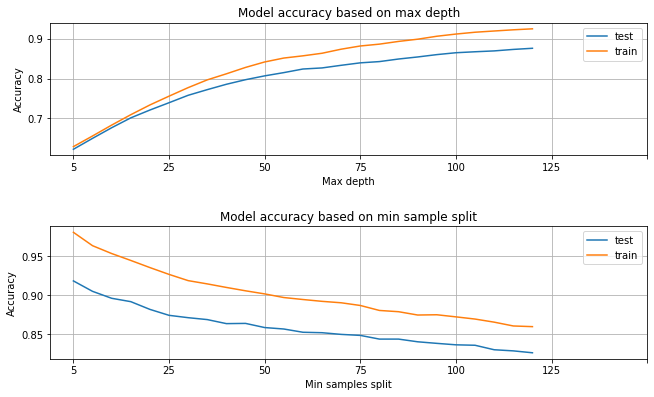

In [ ]:
accuracy_train = []
accuracy_test = []

# Here, we iterate 25 times the model by increasing the max depth each time
# We store the testing and training accuracy of each instance in different lists before ploting them
for i in range(25):

  decisionTree = tree.DecisionTreeClassifier(max_depth=(i+1)*5, random_state=1)

  decisionTree.fit(X_train,y_train)

  y_pred_test=decisionTree.predict(X_test)
  y_pred_train=decisionTree.predict(X_train)

  accuracy_test.append(accuracy_score(y_test, y_pred_test))
  accuracy_train.append(accuracy_score(y_train, y_pred_train))

fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(211)
ax1 = plt.plot(accuracy_test, label='test')
plt.plot(accuracy_train, label='train')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title('Model accuracy based on max depth') 
plt.xticks(np.arange(0,31,5), ['5','25','50','75','100', '125'])
plt.legend()
plt.grid()

fig.tight_layout(pad=4.0)

accuracy_train = []
accuracy_test = []

# Let's repeat the same process for the minimum samples split and plot the accuracy again
for i in range(25):

  decisionTree = tree.DecisionTreeClassifier(min_samples_split=(i+1)*5, random_state=1)

  decisionTree.fit(X_train,y_train)
  
  y_pred_test=decisionTree.predict(X_test)
  y_pred_train=decisionTree.predict(X_train)

  accuracy_test.append(accuracy_score(y_test, y_pred_test))
  accuracy_train.append(accuracy_score(y_train, y_pred_train))

ax3 = fig.add_subplot(212)
ax3 = plt.plot(accuracy_test, label='test')
plt.plot(accuracy_train, label='train')
plt.xlabel('Min samples split')
plt.ylabel('Accuracy')
plt.title('Model accuracy based on min sample split') 
plt.xticks(np.arange(0,31,5), ['5','25','50','75','100', '125'])
plt.legend()
plt.grid()
plt.show()

#### Hyperparameter Tuning - TF-IDF Model

In [ ]:
max_depth = 100
min_samples_split = 5
min_samples_leaf = 1
best_model = tree.DecisionTreeClassifier(criterion='gini', max_depth=max_depth,
                                         min_samples_split=min_samples_split,
                                         min_samples_leaf=min_samples_leaf)

dt = best_model.fit(X_traincv, y_traincv)

y_pred_train = dt.predict(X_traincv)
y_pred_test = dt.predict(X_testcv)

print('Accuracy on training data =', accuracy_score(y_traincv, y_pred_train))
print('Accuracy on testing data =', accuracy_score(y_testcv, y_pred_test))
print('')
print(metrics.classification_report(y_testcv, y_pred_test))

Accuracy on training data = 0.9023084025854109
Accuracy on testing data = 0.7111877064483699

              precision    recall  f1-score   support

           0       0.70      0.57      0.63      2993
           1       0.72      0.82      0.76      3970

    accuracy                           0.71      6963
   macro avg       0.71      0.69      0.70      6963
weighted avg       0.71      0.71      0.71      6963



### **Random Forest**

#### BoW Model

In [ ]:
model = RandomForestClassifier(random_state=42)

rf = model.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print('Accuracy on training data =', metrics.accuracy_score(y_train, y_pred_train))
print('Accuracy on test data =', metrics.accuracy_score(y_test, y_pred_test))
print('')
print(metrics.classification_report(y_test, y_pred_test))
print('')
print('-------------')
print('')

Accuracy on training data = 0.9947144662759968
Accuracy on test data = 0.950021542438604

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2993
           1       0.95      0.96      0.96      3970

    accuracy                           0.95      6963
   macro avg       0.95      0.95      0.95      6963
weighted avg       0.95      0.95      0.95      6963


-------------



#### Hyperparameter Tuning - BoW Model

In [ ]:
# parameters = {'n_estimators':[20, 50, 100, 200, 400, 600, 1000],
#               'max_depth':[10, 30, 50, 100, None],
#               'min_samples_split':[2, 5, 10],
#               'min_samples_leaf':[1, 2, 5],
#               'bootstrap':[True, False]}

# best_model = RandomForestClassifier(random_state=42)

# rf_random = RandomizedSearchCV(estimator=best_model, param_distributions=parameters, 
#                                n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# rf_random.fit(X_train, y_train)


# hard-coded best model from the grid search CV 
# because it takes too much time (± 3h) to run the different configurations
n_estimators = 1000
min_samples_split = 10
min_samples_leaf = 1
max_depth = None
bootstrap = False
best_model = RandomForestClassifier(n_estimators=n_estimators, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_depth=max_depth, bootstrap=bootstrap)

rf = best_model.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print('Accuracy on training data =', metrics.accuracy_score(y_train, y_pred_train))
print('Accuracy on testing data =', metrics.accuracy_score(y_test, y_pred_test))
print('')
print(metrics.classification_report(y_test, y_pred_test))

Accuracy on training data = 0.9936228886590831
Accuracy on testing data = 0.9531811001005314

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2993
           1       0.95      0.97      0.96      3970

    accuracy                           0.95      6963
   macro avg       0.95      0.95      0.95      6963
weighted avg       0.95      0.95      0.95      6963



#### Hyperparameter Tuning - TF-IDF Model

In [ ]:
n_estimators = 1000
min_samples_split = 10
min_samples_leaf = 1
max_depth = None
bootstrap = False
best_model = RandomForestClassifier(n_estimators=n_estimators, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_depth=max_depth, bootstrap=bootstrap)

rf = best_model.fit(X_traincv, y_traincv)

y_pred_train = rf.predict(X_traincv)
y_pred_test = rf.predict(X_testcv)

print('Accuracy on training data =', metrics.accuracy_score(y_traincv, y_pred_train))
print('Accuracy on testing data =', metrics.accuracy_score(y_testcv, y_pred_test))
print('')
print(metrics.classification_report(y_testcv, y_pred_test))

Accuracy on training data = 0.9974145891043398
Accuracy on testing data = 0.8201924457848628

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      2993
           1       0.82      0.87      0.85      3970

    accuracy                           0.82      6963
   macro avg       0.82      0.81      0.81      6963
weighted avg       0.82      0.82      0.82      6963



### **k-NN**

#### BoW model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

model = KNeighborsClassifier()

knn = model.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print('Accuracy on training data =', metrics.accuracy_score(y_train, y_pred_train))
print('Accuracy on testing data =', metrics.accuracy_score(y_test, y_pred_test))
print('')
print(metrics.classification_report(y_test, y_pred_test))

Accuracy on training data = 0.7474299784549092
Accuracy on testing data = 0.6165445928479104

              precision    recall  f1-score   support

           0       0.57      0.46      0.51      2993
           1       0.64      0.74      0.69      3970

    accuracy                           0.62      6963
   macro avg       0.60      0.60      0.60      6963
weighted avg       0.61      0.62      0.61      6963



#### Hyperparameter Tuning - BoW Model

In [ ]:
# leaf_size = list(range(1, 50, 5))
# n_neighbors = list(range(1, 20, 1))
# p=[1,2]

# hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

# model = KNeighborsClassifier()

# knn = GridSearchCV(model, hyperparameters, cv=10)

# best_model = knn.fit(X_train, y_train)

# print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
# print('Best p:', best_model.best_estimator_.get_params()['p'])
# print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

# Hard-coded best model's hyerparameter
model = KNeighborsClassifier(n_neighbors=2, p=1)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('Accuracy on training data =', accuracy_score(y_train, y_pred_train))
print('Accuracy on testing data =', accuracy_score(y_test, y_pred_test))
print('')
print(metrics.classification_report(y_test, y_pred_test))

Accuracy on training data = 0.8384118190212373
Accuracy on testing data = 0.628033893436737

              precision    recall  f1-score   support

           0       0.56      0.65      0.60      2993
           1       0.70      0.61      0.65      3970

    accuracy                           0.63      6963
   macro avg       0.63      0.63      0.63      6963
weighted avg       0.64      0.63      0.63      6963



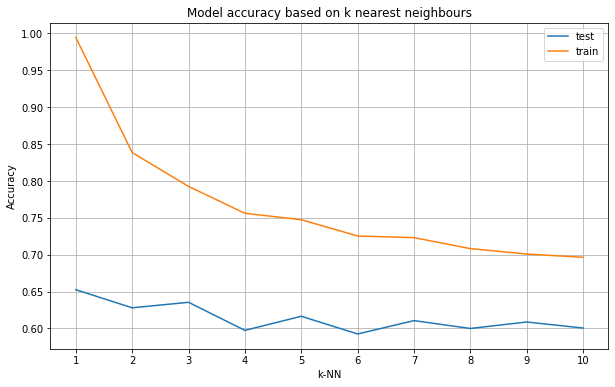

In [ ]:
accuracy_train = []
accuracy_test = []

for i in range(10):

  model = KNeighborsClassifier(n_neighbors=i+1, p=1)

  model.fit(X_train, y_train)

  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  accuracy_test.append(accuracy_score(y_test, y_pred_test))
  accuracy_train.append(accuracy_score(y_train, y_pred_train))

fig = plt.figure(figsize=(10,6))
plt.plot(accuracy_test, label='test')
plt.plot(accuracy_train, label='train')
plt.xlabel('k-NN')
plt.ylabel('Accuracy')
plt.title('Model accuracy based on k nearest neighbours') 
plt.xticks(np.arange(0,10,1), list(np.arange(1,11,1)))
plt.legend()
plt.grid()
plt.show()

#### Hyperparameter Tuning - TF-IDF Model

In [ ]:
model = KNeighborsClassifier(n_neighbors=2, p=1)

model.fit(X_traincv, y_traincv)

y_pred_train = model.predict(X_traincv)
y_pred_test = model.predict(X_testcv)

print('Accuracy on training data =', accuracy_score(y_traincv, y_pred_train))
print('Accuracy on testing data =', accuracy_score(y_testcv, y_pred_test))
print('')
print(metrics.classification_report(y_testcv, y_pred_test))

Accuracy on training data = 0.9969221298861188
Accuracy on testing data = 0.6039063622002011

              precision    recall  f1-score   support

           0       0.95      0.08      0.15      2993
           1       0.59      1.00      0.74      3970

    accuracy                           0.60      6963
   macro avg       0.77      0.54      0.45      6963
weighted avg       0.75      0.60      0.49      6963



### **Neural Network**

In [ ]:
most_frequent_words = feature.count
max_review_length = 18
X_train_NN_temp = sequence.pad_sequences(X_train_NN, maxlen=max_review_length)
X_test_NN_temp = sequence.pad_sequences(X_test_NN, maxlen=max_review_length)
# create the model
emb_length = 32
model = Sequential()
model.add(Embedding(most_frequent_words, emb_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train_NN_temp, np.asarray(y_train_NN), epochs=3, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test_NN_temp, np.asarray(y_test_NN), verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 18, 32)            774496    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 827,797
Trainable params: 827,797
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
254/254 [==============================] - 23s 29ms/step - loss: 0.6031 - accuracy: 0.6491
Epoch 2/3
254/254 [==============================] - 7s 29ms/step - loss: 0.3432 - accuracy: 0.8472
Epoch 3/3
254/254 [==============================] - 7s 29ms/step - loss: 0.2932 - accuracy: 0.8689
Accuracy: 80.50%


## 7. Results Summary

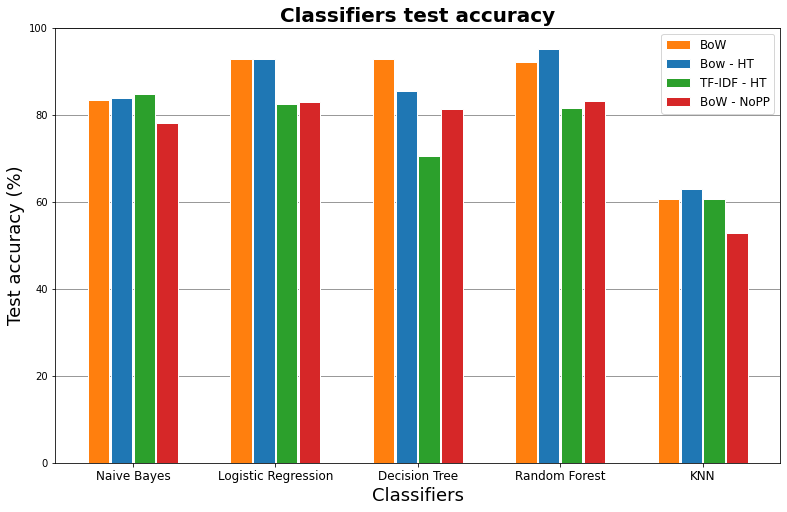

In [ ]:
barWidth = 0.15


bars_basic = [83.4, 92.9, 92.9, 92.3, 60.6]
bars_HT = [84, 92.9, 85.6, 95.3, 62.9]
bars_HT_TF_IDF = [84.8, 82.5, 70.6, 81.6, 60.7]
bars_No_PP = [78.2, 83.1, 81.5, 83.2, 52.9]


r = np.arange(len(bars_basic)) 
r1 = [x + barWidth +0.01 for x in r]
r2 = [x + barWidth +0.01 for x in r1]
r3 = [x + barWidth +0.01 for x in r2]
r4 = [x + barWidth +0.01 for x in r3]
 
fig=plt.figure(figsize=(13,8))

plt.bar(r1, bars_basic, color='tab:orange', width=barWidth, edgecolor='white', label='BoW')
plt.bar(r2, bars_HT, color='tab:blue', width=barWidth, edgecolor='white', label='Bow - HT')
plt.bar(r3, bars_HT_TF_IDF, color='tab:green', width=barWidth, edgecolor='white', label='TF-IDF - HT')
plt.bar(r4, bars_No_PP, color='tab:red', width=barWidth, edgecolor='white', label='BoW - NoPP')

bars_x = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN']
 
plt.xlabel('Classifiers', fontsize=18)
plt.xticks([r + barWidth + 0.25 for r in range(len(bars_x))], bars_x, fontsize = 12)
# plt.xticks(rotation=25)

plt.ylabel('Test accuracy (%)', fontsize=18)

plt.title('Classifiers test accuracy', fontweight='bold', fontsize = 20)

axes = plt.gca()
axes.set_axisbelow(True)
axes.yaxis.grid(color='gray')

plt.legend(fontsize=12)
plt.show()

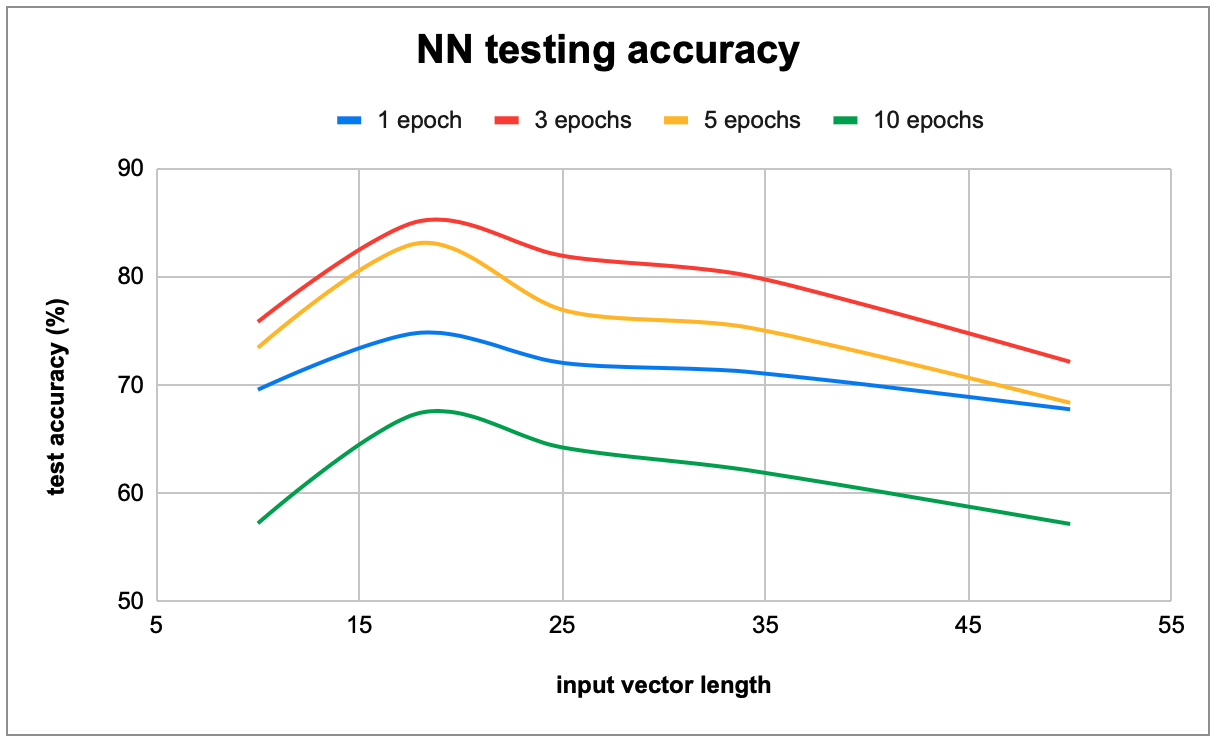